# Mass distribution model of the dwarf galaxy DDO154
> Lessons in Advanced Astrophysics  
Kinematics and dynamics of galaxies  
3 Jun 2022  
Jorge Anais

![DDO154](images/image_4360e-NGC-4789A.jpg)

## Derivation of the velocity contributions of luminous matter

### Stellar disc
The surface brightness profile of DDO154 measured at 3.6 μm with the Spitzer satellite is shown in
Figure 2. Assume that the stellar mass surface density of DDO154 is exponential, and that the total
stellar mass of the disc is $\log(M_{*,tot}/M_\odot) = 7.27$ and the mass-to-light ratio of the disc is $ϒ_{3.6}=0.23$ (in
$M_\odot$/$L_\odot$). The distance to DDO154 is 4.3 Mpc.


#### Q1 - Infer the total luminosity in $L_\odot$

#### Q2 - From figure 2 derive the scale-length $h$ of the stellar disc in kpc



#### Q3 - Deduce the central mass surface density $\Sigma_0$ of the stellar disc in $M_\odot$ $\text{pc}^{-2}$ 

#### Q4 - Deduce the radial profiel of circular velocity of the stellar disc (km/s)

#### Notes:  
The total mass of an exponential disc is given by
$$
M_{\text{tot}} = 2 \pi \Sigma_0 h^2
$$
The squared circular velocity of an exponential disc is given by
$$
v^2 = \pi G \Sigma_0 \frac{r^2}{h} \times \left[I_0 \left(\frac{r}{2h}\right) K_0 \left(\frac{r}{2h}\right)  - I_1 \left(\frac{r}{2h}\right) K_1 \left(\frac{r}{2h}\right) \right]
$$
where $\Sigma_0$ is the central mass surface density, $h$ the scale-length, and $I_k$ and $K_k$ are the $I$ and $K$ Bessel
functions of the 0th and 1st orders.  


$G = 6.673 \times 10^{-11} \text{m}^3 \text{ kg}^{-1} \text{ s}^{-2}$  
$1 M_\odot = 1.989 \times 10^{30} \text{ kg}$   
$1 \text{ pc} = 3.085678 10^13 $   
Hint: recast $G$ so that h and $\Sigma_0$ can be passed as input parameters of a function (developed by yourself) directly into $\text{kpc}$ and $M_\odot \text{ pc}^{-2}$

### Gaseous disc

The velocity contribution of the gaseous disc is obtained by integration of the surface density of the
atomic gas (the HI density has been scale by a factor of 1.4 to take into account the cosmic
contributions of atoms heavier than H). It is given in the second column of the file rcddo154.dat.

## 2. Rotation curve and baryonic velocity contributions

The rotation curve of HI gas in DDO154 is given in the 3rd column of the file rcddo154.dat. The
associated velocity uncertainties $δ_v$ are given in the 4th column.

#### Q5- Draw the rotation curve with uncertainties as a function of radius

In [61]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np


In [62]:
# Kinematic data from Block et al. 2008
t = Table.read("rcddo154.dat", format="ascii")

In [63]:
colnames = ("radius", "vgas", "vobs", "err_vobs")
for old_name, new_name in zip(t.colnames, colnames):
    t.rename_column(old_name, new_name)

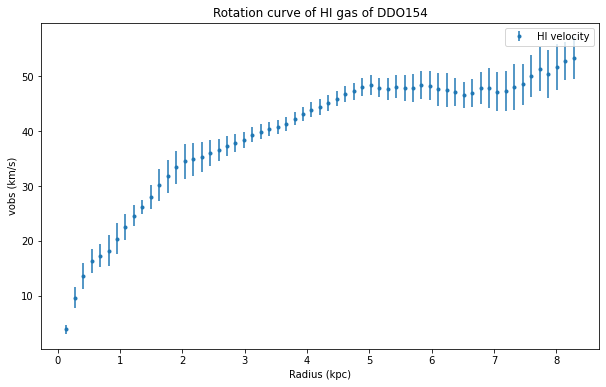

In [78]:
plt.figure(figsize=(10, 6))
plt.errorbar(t["radius"], t["vobs"], yerr=t["err_vobs"], fmt=".", label='HI velocity')
plt.title("Rotation curve of HI gas of DDO154")
plt.xlabel("Radius (kpc)")
plt.ylabel("vobs (km/s)")
plt.legend()
plt.show()

#### Q6 - Overlay the velocity contributions from the stellar disc and the gaseous disc obtained in previous questions

## 3. Mass distribution modeling

The goal here is to fit the mass distribution model to the rotation curve of DDO154 to constrain the
structural parameters of the dark matter density profile, using the velocity contributions from the
stellar disc and the gaseous disc.

#### Q7- Fit the model of rotation curve

assuming a  
- (i) pseudo-isothermal sphere of dark matter (PISmodel), and 
- (ii) a Navarro-Frenk-White density profile for dark matter (NFW model). 

To do that, you
can assume that the weightings of the velocity points are the inverse of the squared uncertainties $w = 1/ δ_v^2$

In [79]:
def pse(r: np.ndarray, rho_0: float, r_c:float) -> np.ndarray:
    """Pseudo-isothermal sphere density profile"""
    return rho_0 * r_c ** 2 / (r ** 2 + r_c ** 2)

def NFW_density(r:np.ndarray, rho_2: float, r_2: float) -> np.ndarray:
    """Navarro-Frenk-White density profile (Navarro+ 1996, 1997)"""
    x = r/r_2
    return 4.0 * rho_2  / x * np.power(x + 1, -2.0)

def Einasto_density(r: np.ndarray, rho_2: float, r_2: float, n: float) -> np.ndarray:
    """Einasto density profile (Navarro+ 2004, 2010, Mamon & Lokas 2005)"""
    return rho_2 * np.exp(-2 * n * (np.power(r/r_2, 1/n) - 1))

#### Q8- What is the model that best fit the rotation curve of DDO154?

#### Q9- Plot the rotation curve and the model of rotation curve for the PIS and NFW models, as well the the contributions from stars, gas and dark matter

#### Q10- Describe the differences between results from the 2 models

### Remainder

Reminder:
The circular velocity for a NFW model is given by 
$$
v^2_{\text{NFW}}(r) = v^2_{200} \, \frac{\frac{\log(1 + \eta) - \eta}{1 + \eta}}{x \left[\log(1+c) - \frac{c}{1+c}\right]}
$$
with 2 characteristic parameters:
- scale velocity $v_{200}$ = velocity (in km/s) of a sphere at a radius $r_{200}$, with $r_{200}$ being the radius at
which the density of the sphere is 200 times the critical density of the closure of the Universe,
$r_{200}=100 v_{200}/H_0$, with $r_{200}$ in kpc, $H_0$ the Hubble constant (68 km/s/Mpc)
- $c$ = concentration of the halo, unitless
- $η= cx$, with $x=r/r_{200}$

The circular velocity for a PIS model is given by
$$
v^2_{\text{PIS}}(r)= 4 \pi G \rho_0 r_c^2 \left( 1 - \frac{r_c}{r \arctan(r/r_c)} \right)
$$
with 2 characteristic parameters:  
- scale density $ρ_0$ of the sphere is the central mass density, in $M_\odot \text{pc}^{-3}$
- $r_c$ = core radius of the sphere, in kpc


Hint: recast $G$ so that $r_c$ and $ρ_0$ can be passed as input parameters of a function (developed by yourself) directly into $\text{kpc}$ and $10^{-3}$ $M_\odot \text{pc}^{-2}$.
